In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

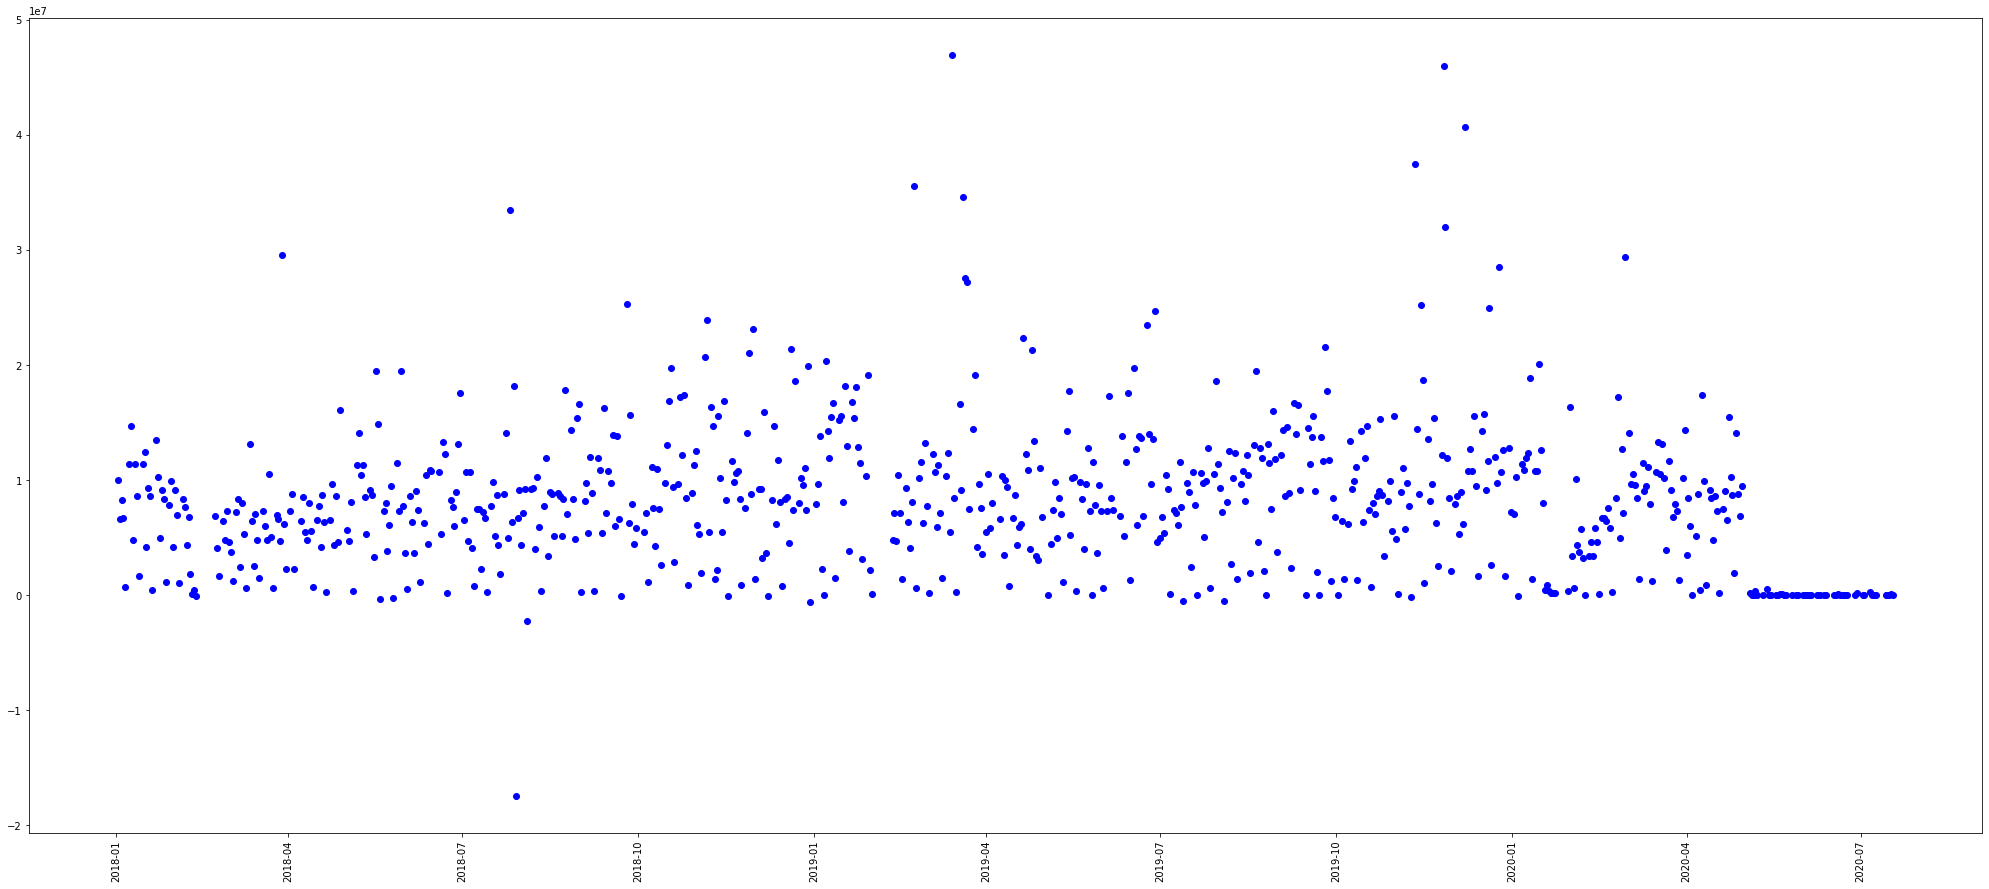

In [16]:
trainday = pd.read_excel(r"G:\traindata\rxdata\rx_daysale.xlsx")#读取展示数据
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111)
# ax.plot(trainday['dates'],trainday['money'],'r-')
ax.plot(trainday['dates'],trainday['money'],'bo')
plt.xticks(rotation=90)
plt.show

In [17]:
trainday  = pd.DataFrame(trainday)#日期数据处理同时将一维矩阵转为二维
X = trainday['dates']
X = X.apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)
y = trainday.iloc[:,-1]
# y.head(10)
y = y.values.reshape(-1, 1)

In [18]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=350)#数据拆分
reg = LinearRegression().fit(Xtrain,Ytrain)#一阶线性模型
reg.score(Xtest,Ytest)

-0.026614471290613118

<function matplotlib.pyplot.show(*args, **kw)>

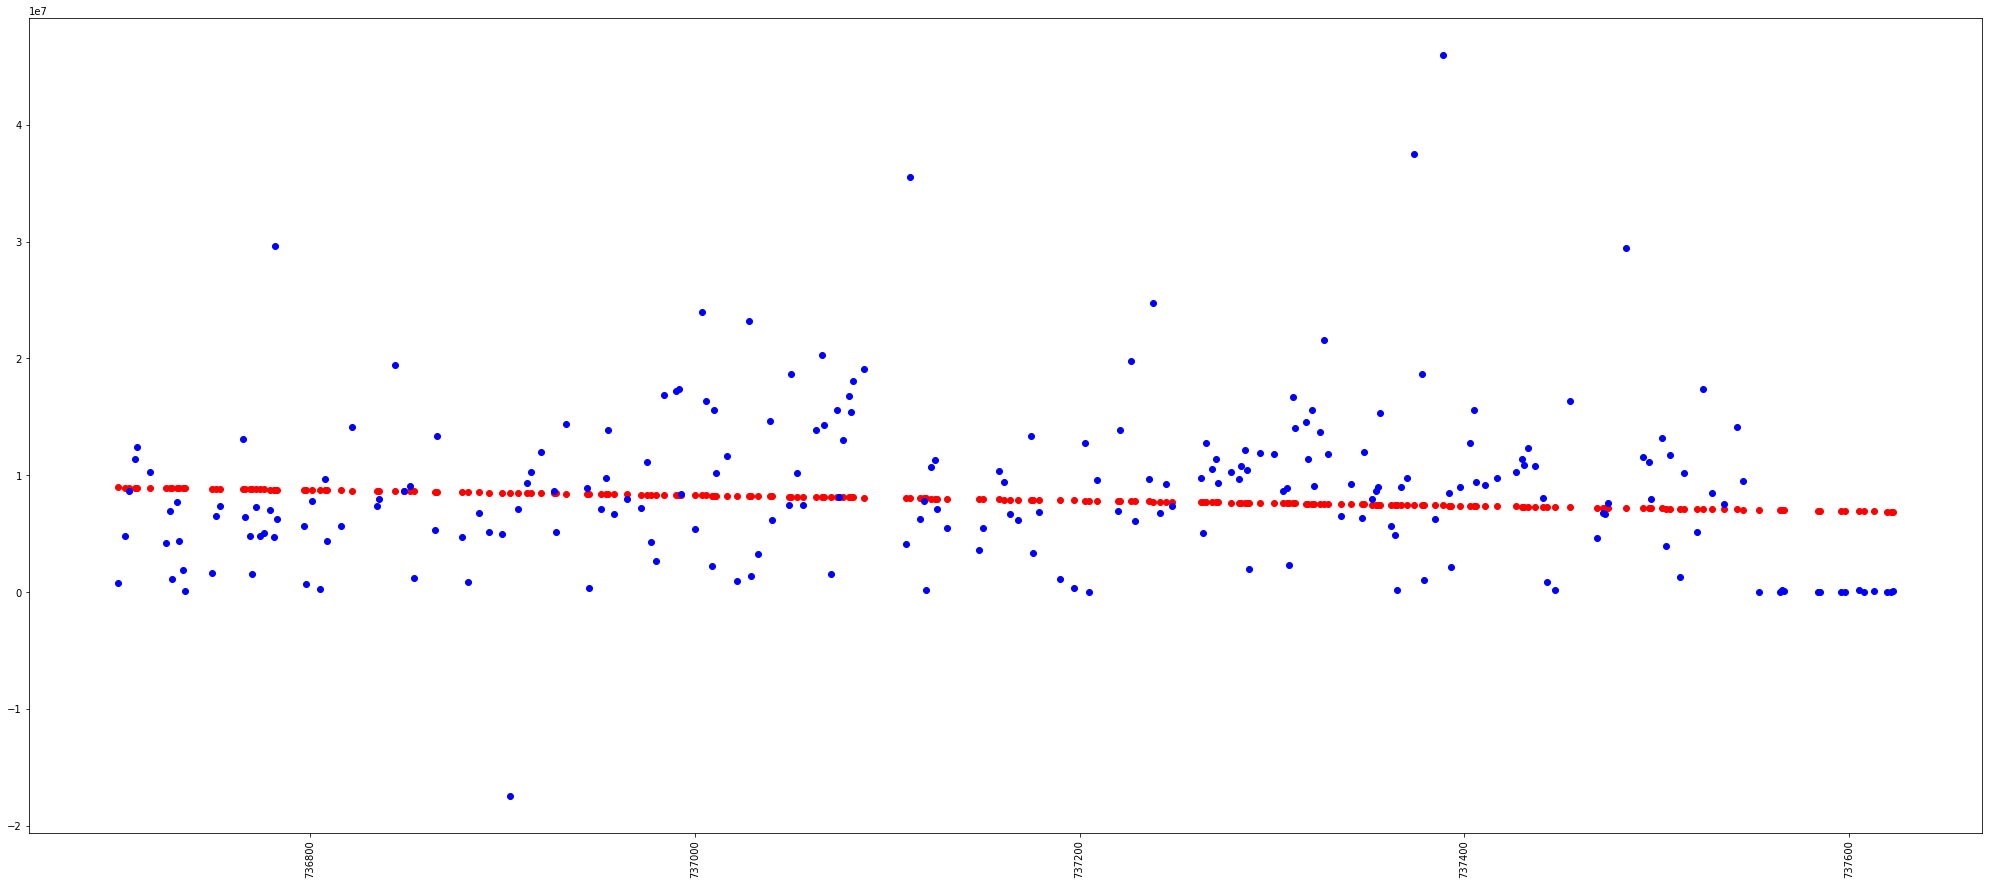

In [5]:
Y_pre = reg.predict(Xtest)#求测试值
fig = plt.figure(figsize=(35, 15))#展示
ax = fig.add_subplot(111)
ax.plot(Xtest,Y_pre,'ro')
ax.plot(Xtest,Ytest,'bo')
plt.xticks(rotation=90)
plt.show

In [19]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
X_test = pd.DataFrame(np.array([
   ['2020-12-01'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']
prediction = reg_coef*int(X_test['Date'])+reg_intercept#预测
prediction

array([[6576276.86194682]])

In [7]:
from sklearn.preprocessing import PolynomialFeatures #多项式回归
poly = PolynomialFeatures(degree=2,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#

In [8]:
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)#建模
j = model.score(Xtest_poly,Ytest)
j

0.06750169253755667

<function matplotlib.pyplot.show(*args, **kw)>

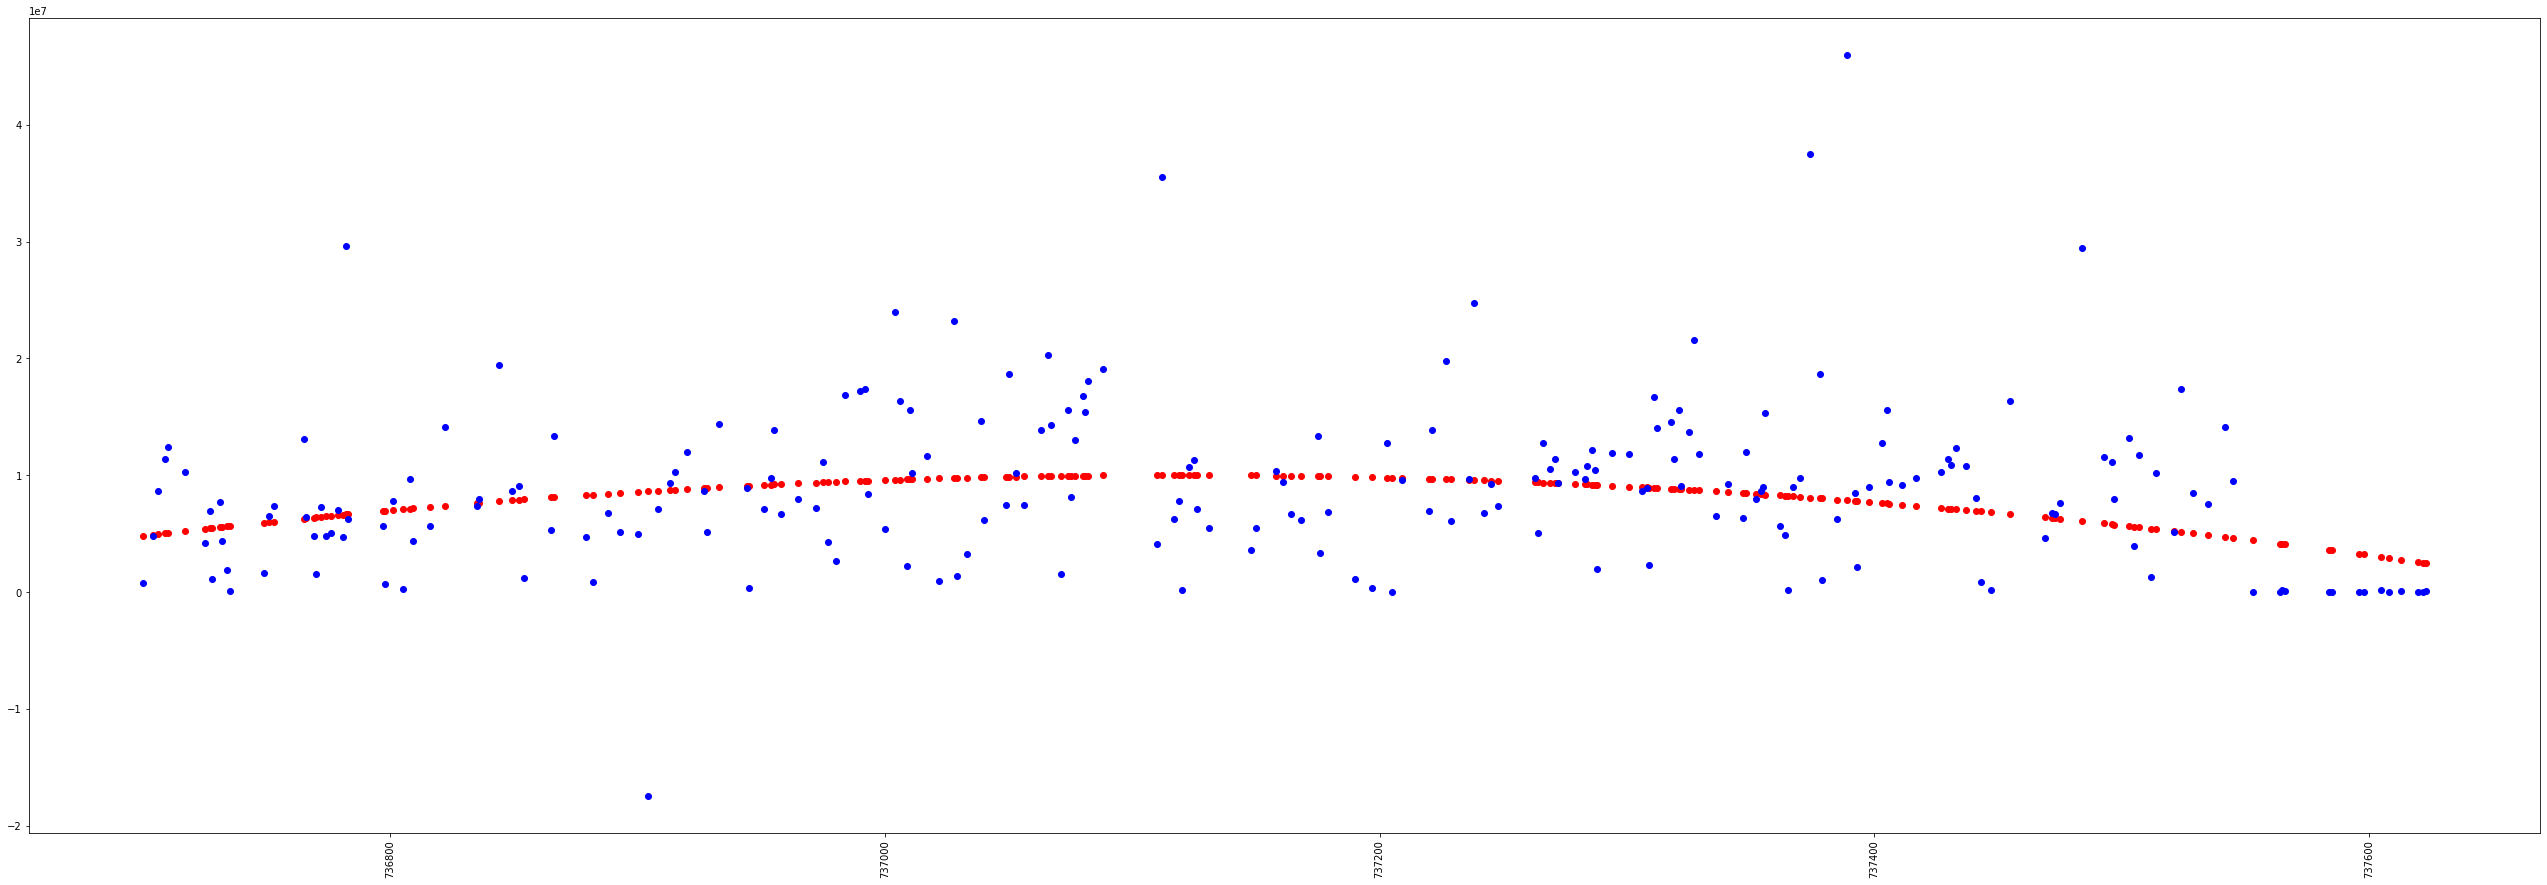

In [9]:
y_pre = model.predict(Xtest_poly)#预测
fig = plt.figure(figsize=(45, 15))#展示
ax = fig.add_subplot(111)
ax.plot(Xtest,y_pre,'ro')
ax.plot(Xtest,Ytest,'bo')
plt.xticks(rotation=90)
plt.show

In [10]:
from sklearn.metrics import r2_score
r2_score(Ytest,y_pre)#评分

0.06750169253755667

In [15]:
# X_test = pd.DataFrame(np.array([
#    ['2020-07-01'],], dtype='datetime64[ns]'))
# X_test.columns = ["Date"]
# X_test['Date'] = pd.to_datetime(X_test['Date'])
# X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
# X_test['Date']
# X_input = X_test['Date'].apply(pd.to_datetime)
# # X = X.values.reshape(-1,1)
# X_input = X_input.map(dt.datetime.toordinal)
# X_input =X_input.values.reshape(-1, 1)
# X_input_poly = poly.fit_transform(X_input.reshape(-1,1))
# X_input_poly
test= pd.read_excel(r"G:\traindata\rxdata\rx_test.xlsx")
test =pd.DataFrame(test)
pre_month = test['months']
pre_month = pre_month.apply(pd.to_datetime)
pre_month = pre_month.map(dt.datetime.toordinal)
pre_month = pre_month.values.reshape(-1, 1)
pre_month
pre_month_poly = poly.fit_transform(pre_month.reshape(-1,1))
y_predict = model.predict(pre_month_poly)#预测
y_predict

array([[ 2955733.16210938],
       [ 2751880.51757812],
       [ 2030907.109375  ],
       [ 1049118.37695312],
       [   44764.18554688],
       [-1049112.40234375],
       [-2161938.70898438]])

In [12]:
from sklearn.metrics import mean_absolute_error

In [13]:
mean_absolute_error(Ytest,Y_pre)#平均绝对误差

4993453.021474916

In [14]:
mean_absolute_error(Ytest,y_pre)#多项平均绝对误差

4558055.345775348